# Analysing the Credit Card Default Dataset and Predicting Credit Card Default

## Table of Contents :- 

### 1.Exploratory Data Analysis (EDA)

### 2.Feature Engineering

### 3.Machine Learning: Logistic Regression Model

### EDA:-
#### 1.Data Overview and Cleaning

In [406]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [407]:
df = pd.read_excel("default of credit card clients.xls",header = 1)
# header = 1 is used to make the 1st row as columns names

In [408]:
# Checking the first few rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [409]:
# checking for the missing values
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [410]:
df = df.dropna()

In [411]:
df.shape

(30000, 25)

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [413]:
# renaming colummn name PAY 0 as PAY 1\
df.rename(columns={"PAY_0" : "PAY_1" , "default payment next month" : "DEFAULT"},inplace = True)
# renaming the PAY_0 as PAY_1 and default pament next month as DEFAULT

In [414]:
df.drop(['ID'],axis=1, inplace=True)
# drop ID cloumns as it is unique value

In [415]:
df.describe()
# since all the values are int64 and no any values are missing

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


###### PAY_i have min = -2 and max = 8
###### LIMIT_BAL min = 10000 and max = 1000000
###### AGE min = 21 and max = 79

In [416]:
df['SEX'].unique()
# prbabily the 1 is for male and 2 is for female

array([2, 1], dtype=int64)

In [417]:
df['EDUCATION'].unique()
# differnet education have differnet rank

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [418]:
df['MARRIAGE'].unique()


array([1, 2, 3, 0], dtype=int64)

In [419]:
defaulters = df['DEFAULT'].sum()
non_defaulters = len(df) - defaulters
# since we know that the deaulters is noted as 1 so we do sum so can calculate number of defaulters

print("defaulters : ",defaulters)
print("non defaulters : ",non_defaulters)



# calculating percentage of defaulters and non-defaulters

per_def = round( ((defaulters/len(df))*100 ),1)
per_non_def = round( ((non_defaulters/len(df))*100 ),1)
print("the percentage of defaulters : ",per_def)
print("the percentage of non defaulters : ",per_non_def)

defaulters :  6636
non defaulters :  23364
the percentage of defaulters :  22.1
the percentage of non defaulters :  77.9


(array([23364.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6636.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

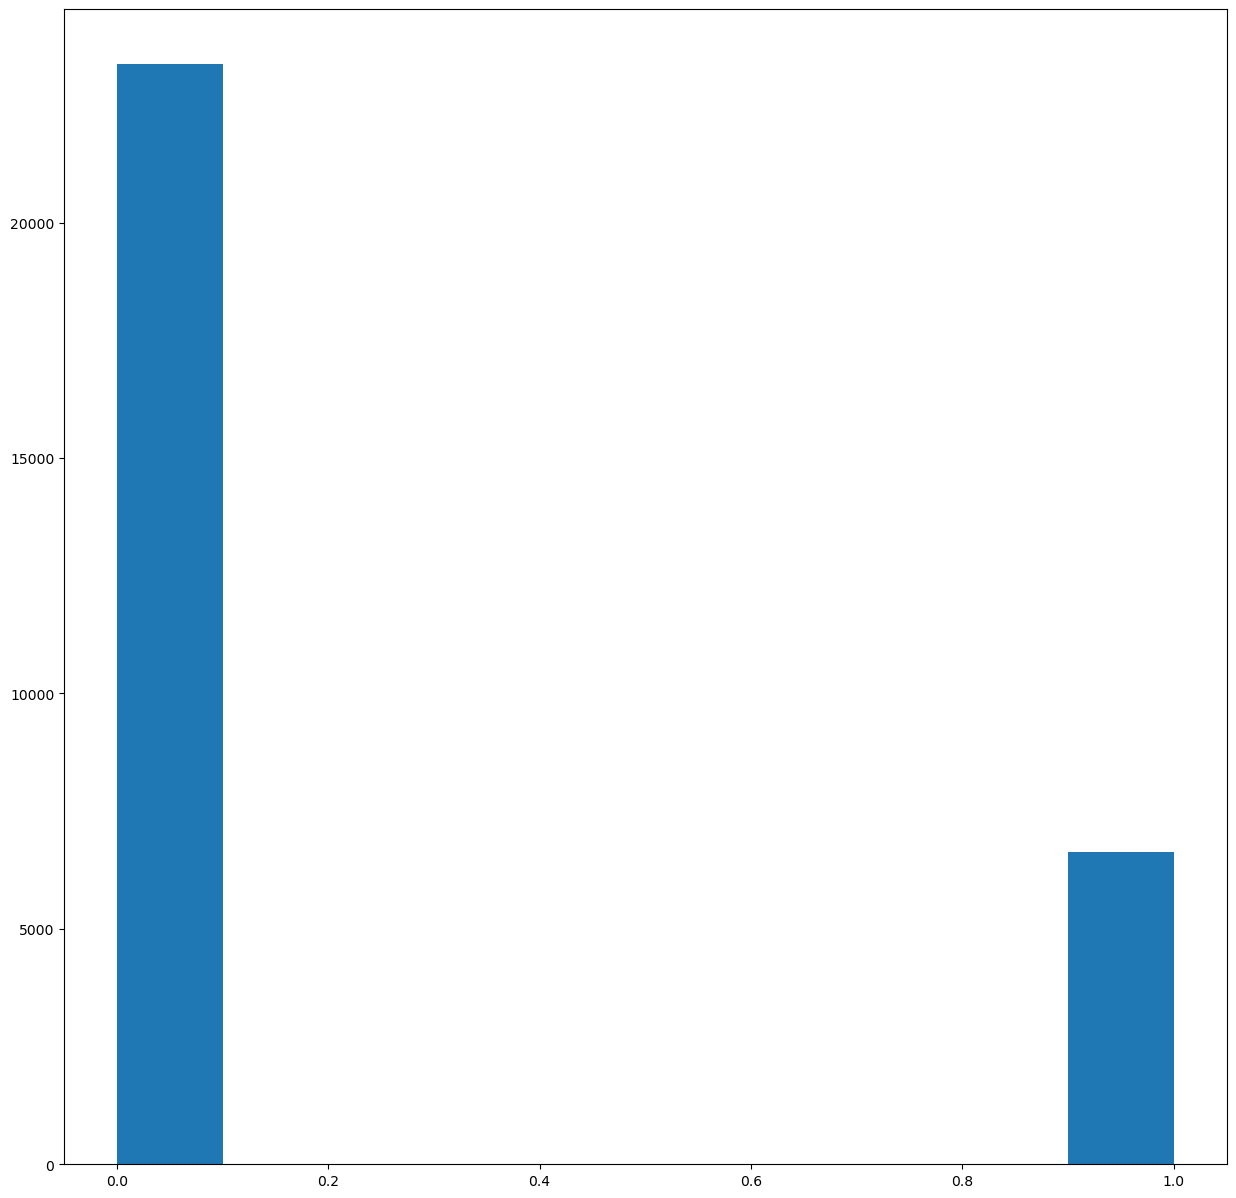

In [420]:
plt.hist(x=df['DEFAULT'])
# non defaulters and defaulters

#### 2.Correlation Between the Variables

In [421]:
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


<Axes: >

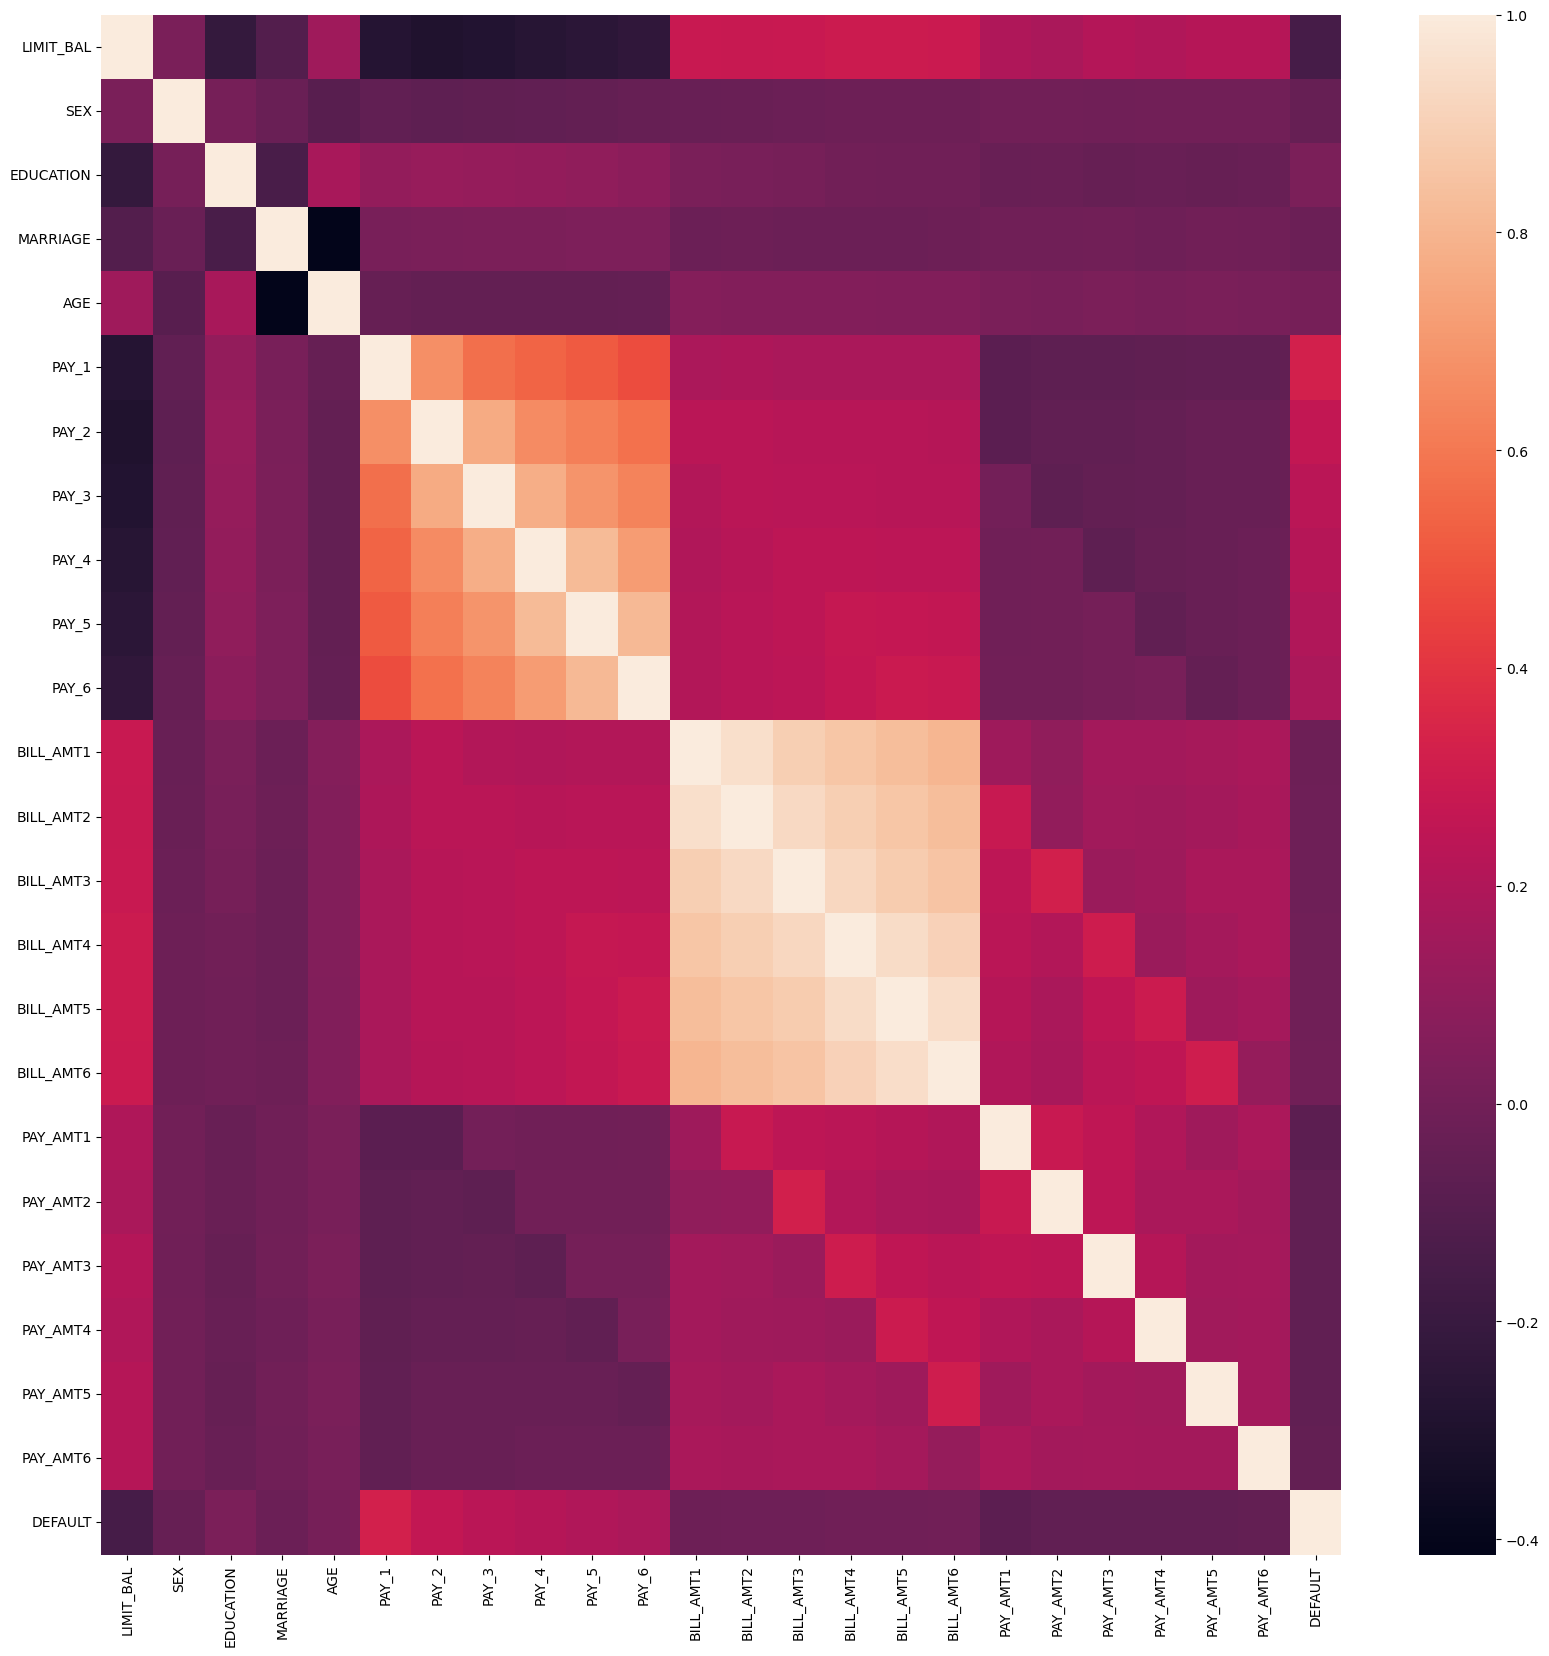

In [422]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr())

#### 3.The Relationship Between the Variables and Default

In [423]:
# to check how many males and females are defaulters and non-defaulters
pd.crosstab(df["DEFAULT"], df['SEX'],margins=True, normalize=False)


SEX,1,2,All
DEFAULT,,,
0,9015,14349,23364
1,2873,3763,6636
All,11888,18112,30000


##### it is analyzed that out of 23364 non-defaulters there are 9015 of sex = 1 and 14349 of sex = 2
##### and out of 6636 defaulters there are 2873 of sex = 1 and 3763 of sex 2
##### and total sex = 1 11888 and sex = 2 = 18112

In [424]:
# to check how many males and females are defaulters and non-defaulters
pd.crosstab(df["DEFAULT"], df['MARRIAGE'],margins=True, normalize=False)

MARRIAGE,0,1,2,3,All
DEFAULT,,,,,
0,49,10453,12623,239,23364
1,5,3206,3341,84,6636
All,54,13659,15964,323,30000


##### it is analyzed that out of 23364 non-defaulters there are 49 of MARRIAGE = 0 
##### and 10453 of MARRIAGE = 1 and 12623 of MARRIAGE = 2 and 239 of MARRIAGE = 3


##### and out of 6636 defaulters there are 5 of MARRIAGE = 0 
##### and 3206 of MARRIAGE = 1 and 3341 of MARRIAGE = 2 and 84 of MARRIAGE = 3

In [425]:
pd.crosstab(df["DEFAULT"], df['EDUCATION'],margins=True, normalize=False)

EDUCATION,0,1,2,3,4,5,6,All
DEFAULT,,,,,,,,
0,14,8549,10700,3680,116,262,43,23364
1,0,2036,3330,1237,7,18,8,6636
All,14,10585,14030,4917,123,280,51,30000


In [426]:
pd.crosstab(df["DEFAULT"], df['AGE'],margins=True, normalize=False)

AGE,21,22,23,24,25,26,27,28,29,30,...,68,69,70,71,72,73,74,75,79,All
DEFAULT,,,,,,,,,,,,,,,,,,,,,
0,53,391,684,827,884,1003,1164,1123,1292,1121,...,4,12,8,3,2,1,1,2,1,23364
1,14,169,247,300,302,253,313,286,313,274,...,1,3,2,0,1,3,0,1,0,6636
All,67,560,931,1127,1186,1256,1477,1409,1605,1395,...,5,15,10,3,3,4,1,3,1,30000


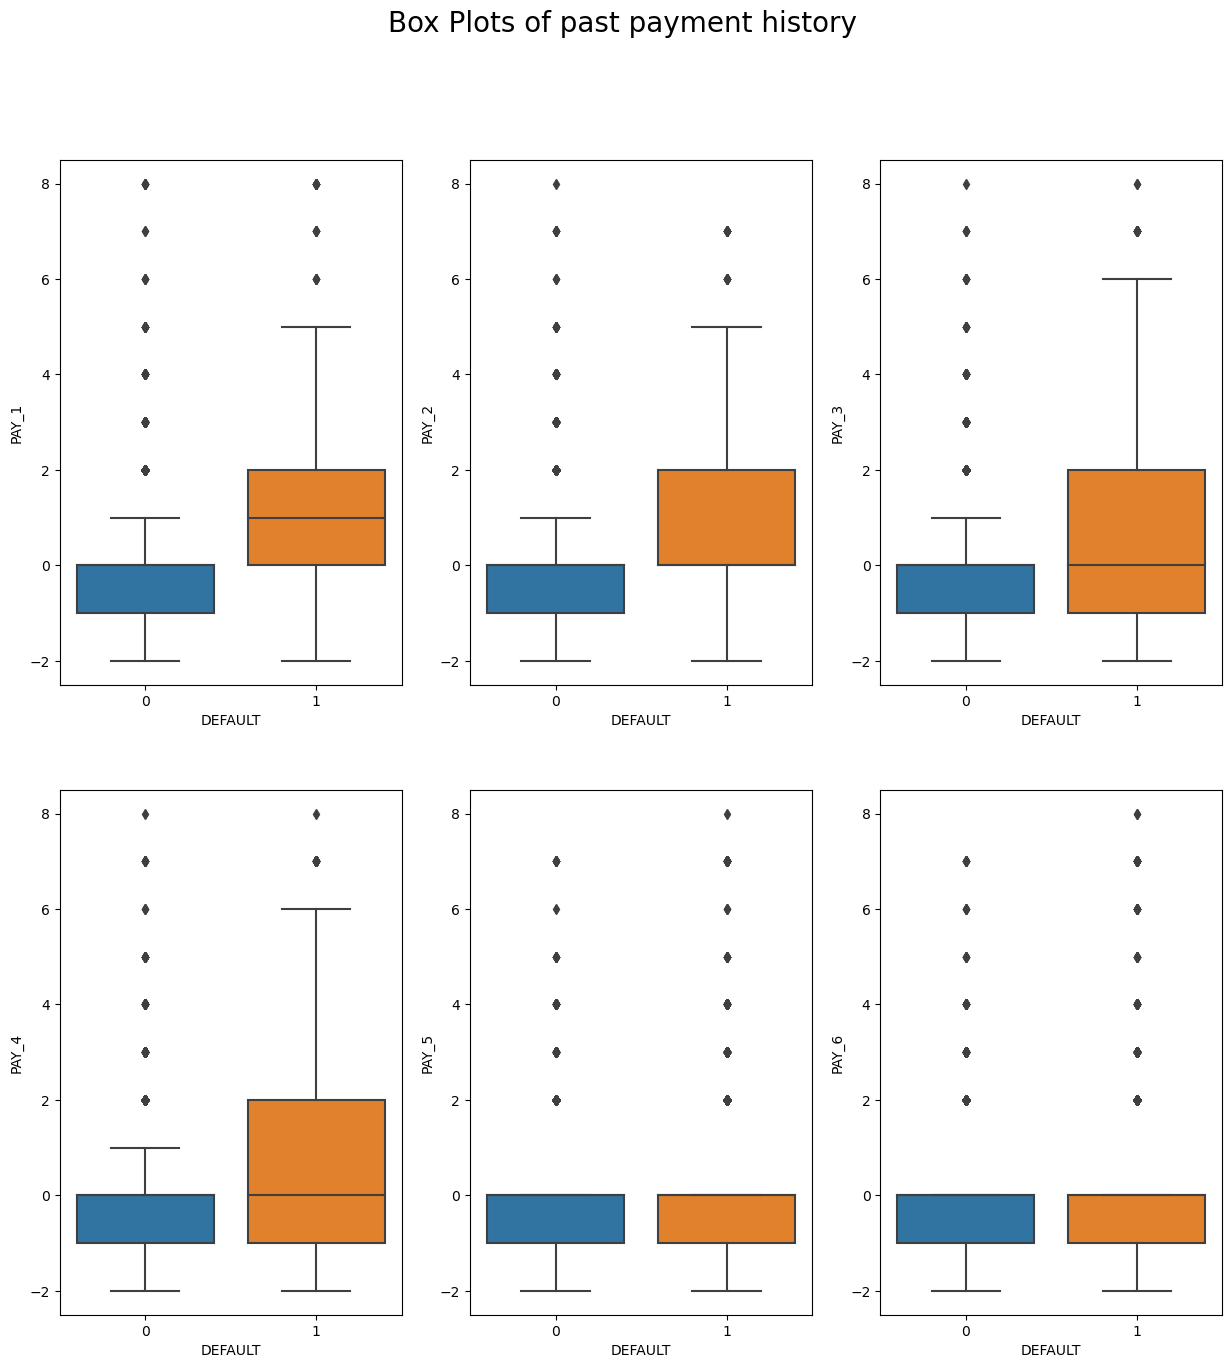

In [427]:
plt.rc('figure', figsize=(15, 15))
fig=plt.figure()
fig.suptitle('Box Plots of past payment history', fontsize=20)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    y = 'PAY_' + str(i)
    sns.boxplot(x='DEFAULT', y=y, data=df)
plt.show()

In [428]:
# there are some outlier with respect to the default

### Feature Engineering :-
#### Adding New Features:-


In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [430]:
df['avg_default'] = round(df.iloc[:,5:11].sum(axis=1)/6,3)
# average default history
df['avg_bill_amt'] = round(df.iloc[:, 11:17].sum(axis=1) / 6,3)
 # average bill amount
df['avg_pay_amt'] = round(df.iloc[:, 18:24].sum(axis=1) / 6,3)
# average payment amount

In [431]:
df = df.drop(['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','MARRIAGE'],axis = 1)

In [432]:
# # ratios columns
# df['pay_bill_rat'] = (df['avg_pay_amt']/df['avg_bill_amt'])+1
# # average payment to average bill ratio
# df['bill_bal_rat'] = round(df['avg_bill_amt'] / df['LIMIT_BAL'],3)
#  # average bill amount to credit limit ratio
# df['pay_bal_rat'] = round(df['avg_pay_amt'] / df['LIMIT_BAL'],3)
# # average payment amount to credit limit ratio

In [433]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,AGE,DEFAULT,avg_default,avg_bill_amt,avg_pay_amt
0,20000,2,2,24,1,-0.333,1284.000,115.000
1,120000,2,2,26,1,0.500,2846.167,833.500
2,90000,2,2,34,0,0.000,16942.167,1583.333
3,50000,2,2,37,0,0.000,38555.667,1064.667
4,50000,1,2,57,0,-0.333,18223.167,9508.167


In [434]:
df_cols = df.columns

### 3.Machine Learning: Logistic Regression Model

In [435]:
# importing all the libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,precision_score,recall_score



In [436]:
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')


imputer = imputer.fit(df)
df = imputer.transform(df)
# this we use for removing tha nan values and fill the mean

In [437]:

df = pd.DataFrame(df,columns=df_cols)
df
# for creating it again as a dataframe

,LIMIT_BAL,SEX,EDUCATION,AGE,DEFAULT,avg_default,avg_bill_amt,avg_pay_amt
0,20000.0,2.0,2.0,24.0,1.0,-0.333,1284.000,115.000
1,120000.0,2.0,2.0,26.0,1.0,0.500,2846.167,833.500
2,90000.0,2.0,2.0,34.0,0.0,0.000,16942.167,1583.333
3,50000.0,2.0,2.0,37.0,0.0,0.000,38555.667,1064.667
4,50000.0,1.0,2.0,57.0,0.0,-0.333,18223.167,9508.167
...,...,...,...,...,...,...,...,...
29995,220000.0,1.0,3.0,39.0,0.0,0.000,120891.500,5675.000
29996,150000.0,1.0,3.0,43.0,0.0,-0.667,3530.333,2108.833
29997,30000.0,1.0,2.0,37.0,1.0,1.333,11749.333,5216.833
29998,80000.0,1.0,3.0,41.0,1.0,-0.167,44435.167,10213.667


In [438]:
#independant and dependant variables
X = df.drop(["DEFAULT"],axis = 1)

In [439]:
y = pd.DataFrame(df["DEFAULT"])


# y = y.ravel()


In [440]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
# train and test split

In [441]:
X_train.shape

(21000, 7)

In [442]:
X_test.shape

(9000, 7)

In [443]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


# standard scaler for fitting and trainforming the data






In [444]:
model=LogisticRegression()

In [445]:
#you are training your model here
model.fit(X_train,y_train)



C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [446]:
model.score(X_train,y_train)
# our train model score 81% accurate

0.7972857142857143

In [447]:
y_pred=model.predict(X_test)

In [448]:
# test accuracy
accuracy_score(y_test,y_pred)
# the test model also accruate about 80%

0.7967777777777778

In [449]:
# means our model is accurate with 80% accuracy not overfitted and niether underfitted 

In [450]:
confusion_matrix(y_test,y_pred)

array([[6876,  164],
       [1665,  295]], dtype=int64)

In [451]:
roc_auc_score(y_test, y_pred)
# roc-auc score as well

0.5636073747680891

In [452]:
precision_score(y_test, y_pred)
# precision score

0.6427015250544662

In [453]:
recall_score(y_test, y_pred)
# recall_score

0.15051020408163265

## in the credit card default problem, the cost of false positives and false negatives may be different.
## For example, false positives (predicting a user will default when they actually do not) may lead to unnecessary 
## fees or penalties, while false negatives (predicting a user will not default when they actually do) may lead to losses 
## for the credit card company. Therefore, metrics like precision and recall may be more appropriate for this problem than accuracy.

## in this usecase for the company perspective we have to reduce the FP and for the customer perspective we have to reduce FN